<a href="https://colab.research.google.com/github/hareeshmahant05/Cat-and-Dog-Image-Classifier/blob/main/Cat_vs_Dog_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators to create batches
train_ds = keras.utils.image_dataset_from_directory(
directory='/content/train',
labels='inferred',
label_mode= 'int',
batch_size=32,
image_size=(256,256)
)
validation_ds= keras.utils.image_dataset_from_directory(
directory='/content/test',
labels='inferred',
label_mode= 'int',
batch_size=32,
image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize the Datasets
def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [7]:
#Creating CNN Model
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 101ms/step - loss: 1.1034 - accuracy: 0.5891 - val_loss: 0.6391 - val_accuracy: 0.6362
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5804 - accuracy: 0.6967 - val_loss: 0.5573 - val_accuracy: 0.7198
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5119 - accuracy: 0.7551 - val_loss: 0.6962 - val_accuracy: 0.5924
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4756 - accuracy: 0.7743 - val_loss: 0.4697 - val_accuracy: 0.7774
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3886 - accuracy: 0.8221 - val_loss: 0.4330 - val_accuracy: 0.7904
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3377 - accuracy: 0.8537 - val_loss: 0.5611 - val_accuracy: 0.7136
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2480 - accuracy: 0.8944 - val_loss: 0.5156 - val_ac

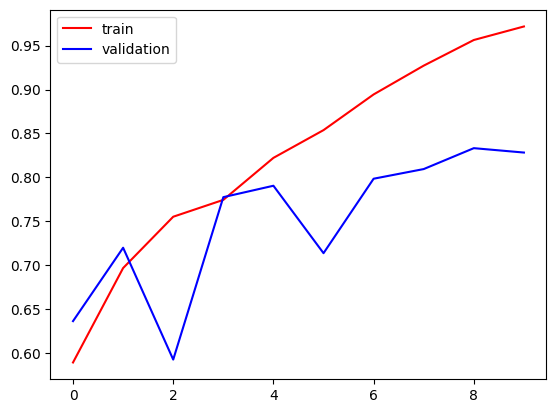

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

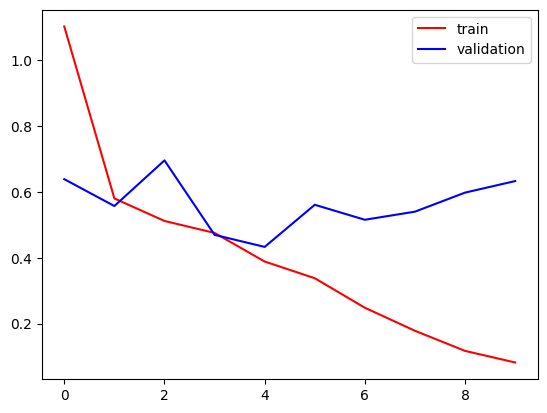

In [12]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [46]:
test_image= cv2.imread('/content/cat.jpg')

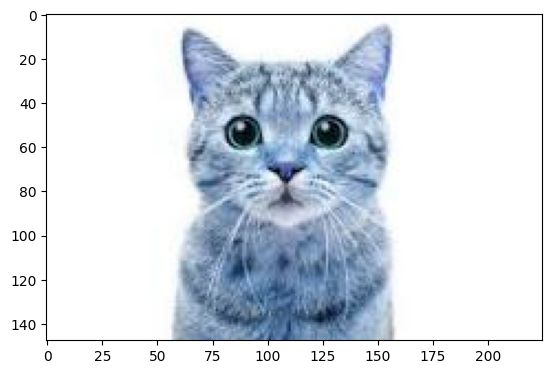

In [47]:
plt.imshow(test_image)

In [48]:
test_image.shape

(148, 225, 3)

In [49]:
test_image = cv2.resize(test_image, (256,256))

In [50]:
test_input = test_image.reshape(1,256,256,3)

In [51]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)